C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 23706 samples in 0.008s...
[t-SNE] Computed neighbors for 23706 samples in 12.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23706
[t-SNE] Computed conditional probabilities for sample 2000 / 23706
[t-SNE] Computed conditional probabilities for sample 3000 / 23706
[t-SNE] Computed conditional probabilities for sample 4000 / 23706
[t-SNE] Computed conditional probabilities for sample 5000 / 23706
[t-SNE] Computed conditional probabilities for sample 6000 / 23706
[t-SNE] Computed conditional probabilities for sample 7000 / 23706
[t-SNE] Computed conditional probabilities for sample 8000 / 23706
[t-SNE] Computed conditional probabilities for sample 9000 / 23706
[t-SNE] Computed conditional probabilities for sample 10000 / 23706
[t-SNE] Computed conditional probabilities for sample 11000 / 23706
[t-SNE] Computed conditional probabilities for sample 12000 / 23706
[t-SNE] Computed conditional probabilities for s

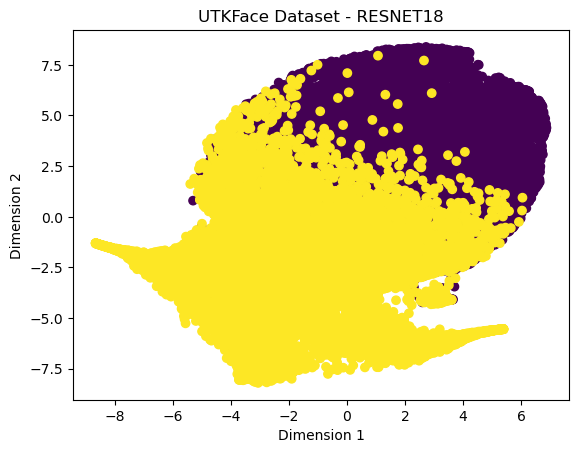

In [4]:
import torch
import torchvision
from torchvision import models, transforms
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

saved_model_path = 'UTKFace-RESNET.pth'

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

model = torchvision.models.resnet18(pretrained=False, num_classes=2)
model.load_state_dict(torch.load(saved_model_path))

model = torch.nn.Sequential(*list(model.children())[:-1])

model.eval()

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data = torchvision.datasets.ImageFolder(root=r'D:/SupraAI Project/BinarySplit/', transform=transform)

features = []
labels_list = []

class_names = data.classes

for inputs, labels in data:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy())
        labels_list.append(labels)

features_np = np.array(features)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_np)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_list)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("UTKFace Dataset - RESNET18")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 23706 samples in 0.800s...
[t-SNE] Computed neighbors for 23706 samples in 279.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23706
[t-SNE] Computed conditional probabilities for sample 2000 / 23706
[t-SNE] Computed conditional probabilities for sample 3000 / 23706
[t-SNE] Computed conditional probabilities for sample 4000 / 23706
[t-SNE] Computed conditional probabilities for sample 5000 / 23706
[t-SNE] Computed conditional probabilities for sample 6000 / 23706
[t-SNE] Computed conditional probabilities for sample 7000 / 23706
[t-SNE] Computed conditional probabilities for sample 8000 / 23706
[t-SNE] Computed conditional probabilities for sample 9000 / 23706
[t-SNE] Computed conditional probabilities for sample 10000 / 23706
[t-SNE] Computed conditional probabilities for sample 11000 / 23706
[t-SNE] Computed conditional probabilities for sample 12000 / 23706
[t-SNE] Computed conditional probabilities for 

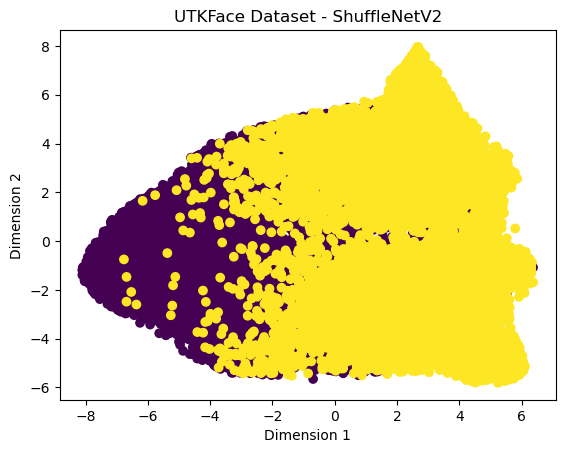

In [7]:
import torch
import torchvision
from torchvision import models, transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

saved_model_path = 'UTKFace-ShuffleNet.pth'

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes = 2)
model.load_state_dict(torch.load(saved_model_path))

model = torch.nn.Sequential(*list(model.children())[:-1])

model.eval()

transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

data = torchvision.datasets.ImageFolder(root=r'D:/SupraAI Project/BinarySplit/', transform=transform)

features = []
labels_list = []

for inputs, labels in data:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy().flatten())
        labels_list.append(labels)

features_np = np.array(features)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_np)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_list)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("UTKFace Dataset - ShuffleNetV2")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11030 samples in 0.004s...
[t-SNE] Computed neighbors for 11030 samples in 2.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11030
[t-SNE] Computed conditional probabilities for sample 2000 / 11030
[t-SNE] Computed conditional probabilities for sample 3000 / 11030
[t-SNE] Computed conditional probabilities for sample 4000 / 11030
[t-SNE] Computed conditional probabilities for sample 5000 / 11030
[t-SNE] Computed conditional probabilities for sample 6000 / 11030
[t-SNE] Computed conditional probabilities for sample 7000 / 11030
[t-SNE] Computed conditional probabilities for sample 8000 / 11030
[t-SNE] Computed conditional probabilities for sample 9000 / 11030
[t-SNE] Computed conditional probabilities for sample 10000 / 11030
[t-SNE] Computed conditional probabilities for sample 11000 / 11030
[t-SNE] Computed conditional probabilities for sample 11030 / 11030
[t-SNE] Mean sigma: 0.198184
[t-SNE] KL divergenc

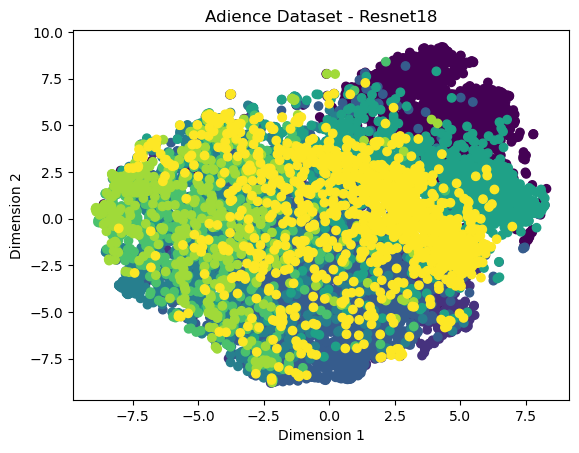

In [5]:
import torch, torchvision
from torchvision import models, transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

saved_model_path = 'Adience_resnet.pth'

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

model = torchvision.models.resnet18(pretrained=False, num_classes=8)
model.load_state_dict(torch.load(saved_model_path))

model = torch.nn.Sequential(*list(model.children())[:-1])

model.eval()

transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

data = torchvision.datasets.ImageFolder(root=r'D:/SupraAI Project/Adience/Adience/', transform=transform)

features = []
labels_list = []

for inputs, labels in data:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy())
        labels_list.append(labels)
features_np = np.array(features)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_np)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_list)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Adience Dataset - Resnet18")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7591 samples in 0.003s...
[t-SNE] Computed neighbors for 7591 samples in 1.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7591
[t-SNE] Computed conditional probabilities for sample 2000 / 7591
[t-SNE] Computed conditional probabilities for sample 3000 / 7591
[t-SNE] Computed conditional probabilities for sample 4000 / 7591
[t-SNE] Computed conditional probabilities for sample 5000 / 7591
[t-SNE] Computed conditional probabilities for sample 6000 / 7591
[t-SNE] Computed conditional probabilities for sample 7000 / 7591
[t-SNE] Computed conditional probabilities for sample 7591 / 7591
[t-SNE] Mean sigma: 0.101511
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.290405
[t-SNE] KL divergence after 300 iterations: 2.732381


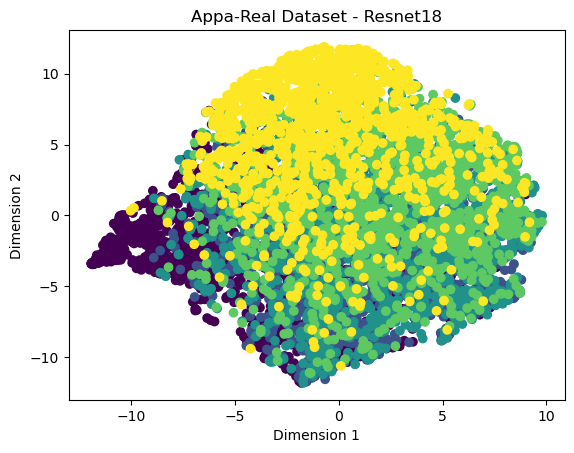

In [8]:
import torch, torchvision
from torchvision import models, transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

saved_model_path = 'Appa-Real_resnet.pth'

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

model = torchvision.models.resnet18(pretrained=False, num_classes=5)
model.load_state_dict(torch.load(saved_model_path))

model = torch.nn.Sequential(*list(model.children())[:-1])

model.eval()

transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

data = torchvision.datasets.ImageFolder(root=r'D:/SupraAI Project/Appa-Real/Appa-Real/', transform=transform)

features = []
labels_list = []

for inputs, labels in data:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy())
        labels_list.append(labels)
features_np = np.array(features)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_np)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_list)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Appa-Real Dataset - Resnet18")
plt.show()